In [ ]:
import pandas as pd
df = pd.read_csv('sample_data/titanic.csv')

In [ ]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.25


In [ ]:
df.shape

(887, 8)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
df.info

<bound method DataFrame.info of      Survived  Pclass  ... Parents/Children Aboard     Fare
0           0       3  ...                       0   7.2500
1           1       1  ...                       0  71.2833
2           1       3  ...                       0   7.9250
3           1       1  ...                       0  53.1000
4           0       3  ...                       0   8.0500
..        ...     ...  ...                     ...      ...
882         0       2  ...                       0  13.0000
883         1       1  ...                       0  30.0000
884         0       3  ...                       2  23.4500
885         1       1  ...                       0  30.0000
886         0       3  ...                       0   7.7500

[887 rows x 8 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of      Survived  Pclass  ... Parents/Children Aboard     Fare
0           0       3  ...                       0   7.2500
1           1       1  ...                       0  71.2833
2           1       3  ...                       0   7.9250
3           1       1  ...                       0  53.1000
4           0       3  ...                       0   8.0500
..        ...     ...  ...                     ...      ...
882         0       2  ...                       0  13.0000
883         1       1  ...                       0  30.0000
884         0       3  ...                       2  23.4500
885         1       1  ...                       0  30.0000
886         0       3  ...                       0   7.7500

[887 rows x 8 columns]>

In [ ]:
df.nunique(axis=0)

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

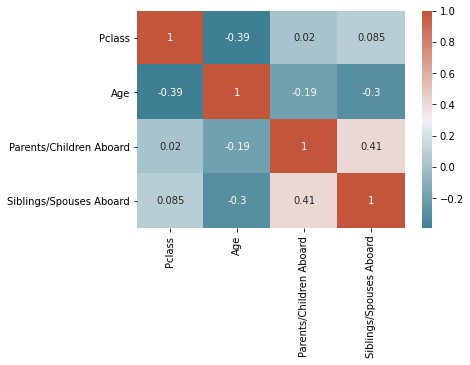

In [ ]:
import seaborn as sns
corr = df[['Pclass', 'Age', 'Parents/Children Aboard', 'Siblings/Spouses Aboard']][:].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

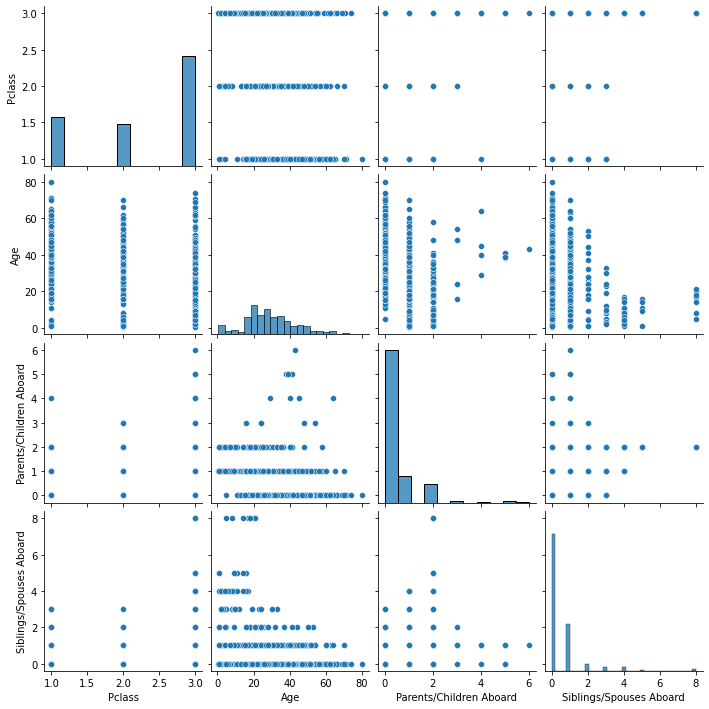

In [ ]:
sns.pairplot(df[['Pclass', 'Age', 'Parents/Children Aboard', 'Siblings/Spouses Aboard']][:])

In [ ]:
#preprocessing

df.rename(columns= {
    'Siblings/Spouses Aboard':'Siblings',
    'Parents/Children Aboard': 'Parents'
}, inplace=True)

    
df['Pclass']=df['Pclass'].apply(lambda val: 2 if val > 1 else 1)

df['Age']=df['Age'].apply(lambda val: "Young" if val < 20 else "Adult")

df['Parents']=df['Parents'].apply(lambda val: "Yes" if val > 0 else "No")

df['Siblings']=df['Siblings'].apply(lambda val: "Yes" if val > 0 else "No")

In [ ]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents
0,0,2,male,Adult,Yes,No


In [ ]:
subset = df[:]
examples = [tuple(x) for x in subset.values]
training_ex=examples[:10]
training_ex

[(0, 2, 'male', 'Adult', 'Yes', 'No'),
 (1, 1, 'female', 'Adult', 'Yes', 'No'),
 (1, 2, 'female', 'Adult', 'No', 'No'),
 (1, 1, 'female', 'Adult', 'Yes', 'No'),
 (0, 2, 'male', 'Adult', 'No', 'No'),
 (0, 2, 'male', 'Adult', 'No', 'No'),
 (0, 1, 'male', 'Adult', 'No', 'No'),
 (0, 2, 'male', 'Young', 'Yes', 'Yes'),
 (1, 2, 'female', 'Adult', 'No', 'Yes'),
 (1, 2, 'female', 'Young', 'Yes', 'No')]

In [ ]:
def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n

In [ ]:
# Function to check generality between two hypothesis
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != '0' and (x == y or y == '0'))
        more_general_parts.append(mg)
    return all(more_general_parts) # Returns true if all elements of list or tuple are true

# Function to check whether train examples are consistent with hypothesis
def consistent(hypothesis,example):
    return more_general(hypothesis, example)

# To obtain the domain of attribute values defined in the instances X
def get_domains(examples):
    # set function returns the unordered collection of items with no duplicates
    d = [set() for i in examples[0]] 
    for x in examples:
        #Enumerate() function adds a counter to an iterable and returns it in a form of enumerate object i.e(index,value)
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

In [ ]:
# Function to add min_generalizations
def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not consistent(h[i:i+1],x[i:i+1]):
            if h[i] != '0':
                h_new[i] = '?'
            else:
                h_new[i] = x[i]
    return [tuple(h_new)]

# Function to generalize Specific hypothesis
def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not consistent(s,x):
            S.remove(s)
            Splus = min_generalizations(s, x)
            # Keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            # Remove from S any hypothesis more general than any other hypothesis in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [ ]:
# Function to add min_specializations
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == '?':
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != '0':
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

# Function to specialize General hypotheses boundary
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if consistent(g,x):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            # Keep only specializations that have a counterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            # Remove hypothesis less general than any other hypothesis in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [ ]:
# Function to perform CandidateElimination
def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    
    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    # print("\n G[{0}]:".format(i),G)
    # print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
        if cx==1: # x is positive example
            G = {g for g in G if consistent(g,x)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not consistent(s,x)}
            G = specialize_G(x, domains, G, S)
        # print("\n G[{0}]:".format(i),G)
        # print("\n S[{0}]:".format(i),S)
    return G,S

In [ ]:
G, S = candidate_elimination(training_ex)

In [ ]:
G

{('?', '?', '?', 'Young', 'No'),
 ('?', 1, '?', 'Young', '?'),
 ('?', 1, 'female', '?', 'No'),
 ('?', 1, 'male', '?', 'Yes'),
 ('?', 2, 'female', 'Adult', 'Yes'),
 (0, '?', 'female', '?', '?'),
 (0, 1, '?', '?', 'Yes'),
 (1, '?', 'male', '?', '?'),
 (1, 1, '?', '?', 'No'),
 (1, 2, '?', 'Adult', 'Yes')}

In [ ]:
S

{('0', '0', '0', '0', '0')}